# Classification(Lesson 3)
## SVM(Support Vector Machine)

### First of all import needed packages

In [58]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import matplotlib.pyplot as plt
import scipy.optimize as opt
import pandas as pd
import pylab as pl
import numpy as np
# Use this to show matplotlib and plots properly(But not essential)
%matplotlib inline

### Read the csv(Comma seperated value) file with pandas

In [59]:
Data_Frame = pd.read_csv('Cell_Sample.csv')
Data_Frame.head()

,ID,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [60]:
Data_Frame['Class'][0:21]

0     2
1     2
2     2
3     2
4     2
5     4
6     2
7     2
8     2
9     2
10    2
11    2
12    4
13    2
14    4
15    4
16    2
17    2
18    4
19    2
20    4
Name: Class, dtype: int64

In [61]:
Data_Frame['Class'].value_counts()

Class
2    458
4    241
Name: count, dtype: int64

<Axes: >

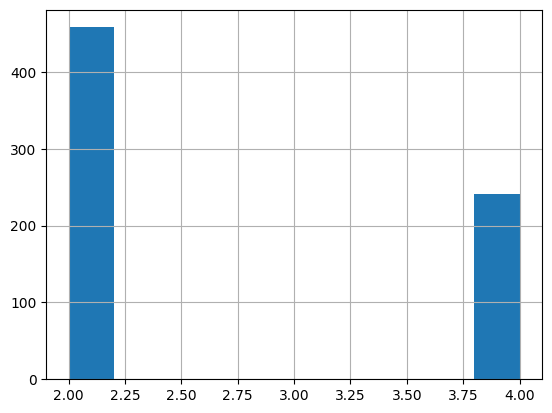

In [62]:
Data_Frame['Class'].hist()

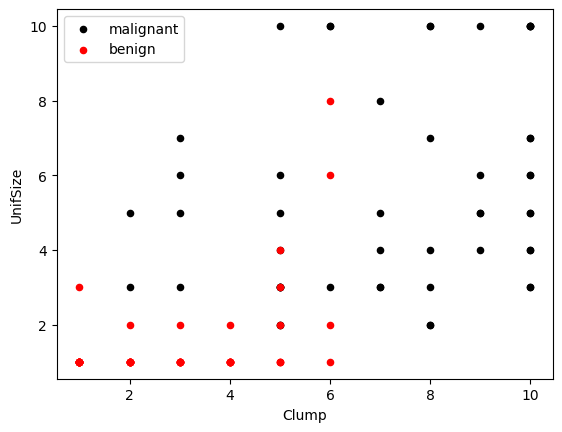

In [63]:
ax = Data_Frame[Data_Frame['Class']==4][0:50].plot(kind='scatter',x='Clump',
                                                  y='UnifSize',color='black',
                                                  label='malignant');
Data_Frame[Data_Frame['Class']==2][0:50].plot(kind='scatter',x='Clump',
                                                  y='UnifSize',color='red',
                                              label='benign',ax=ax);
plt.show()

### Cleaning data

In [129]:
Data_Frame.dtypes

ID             int64
Clump          int64
UnifSize       int64
UnifShape      int64
MargAdh        int64
SingEpiSize    int64
BareNuc        int64
BlandChrom     int64
NormNucl       int64
Mit            int64
Class          int64
dtype: object

In [130]:
print(Data_Frame['BareNuc'].value_counts())

BareNuc
1     402
10    132
2      30
5      30
3      28
8      21
4      19
9       9
7       8
6       4
Name: count, dtype: int64


In [131]:
Data_Frame = Data_Frame[pd.to_numeric(Data_Frame['BareNuc'],errors='coerce').notnull()]
Data_Frame['BareNuc'] = Data_Frame['BareNuc'].astype('int')
Data_Frame.dtypes

ID             int64
Clump          int64
UnifSize       int64
UnifShape      int64
MargAdh        int64
SingEpiSize    int64
BareNuc        int64
BlandChrom     int64
NormNucl       int64
Mit            int64
Class          int64
dtype: object

In [132]:
Feature_Data_Frame = Data_Frame[['Clump','UnifSize','UnifShape','MargAdh','SingEpiSize','BareNuc','BlandChrom','NormNucl','Mit']]
x = np.asarray(Feature_Data_Frame)
x[0:5]

array([[ 5,  1,  1,  1,  2,  1,  3,  1,  1],
       [ 5,  4,  4,  5,  7, 10,  3,  2,  1],
       [ 3,  1,  1,  1,  2,  2,  3,  1,  1],
       [ 6,  8,  8,  1,  3,  4,  3,  7,  1],
       [ 4,  1,  1,  3,  2,  1,  3,  1,  1]])

In [133]:
Data_Frame['Class'] = Data_Frame['Class'].astype('int')
y = np.asarray(Data_Frame['Class'])
y[0:5]

array([2, 2, 2, 2, 2])

### Split your data into test and train

In [120]:
# 20 % for test and 80 % for train
x_train , x_test , y_train , y_test = train_test_split(x,y,
                                                      test_size=0.2,
                                                      random_state=4)
print(f'Train_x : {x_train.shape}\nTrain_y : {y_train.shape}')
print('\n')
print(f'Test_x : {x_test.shape}\nTest_y : {y_test.shape}')

Train_x : (546, 9)
Train_y : (546,)


Test_x : (137, 9)
Test_y : (137,)


### Create and run your model

In [106]:
from sklearn import svm
SVM_Model = svm.SVC(kernel='rbf')
SVM_Model.fit(x_train,y_train)

,C,1.0
,kernel,'rbf'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [134]:
predicted_y = SVM_Model.predict(x_test)
print('Predicted values : ',predicted_y[0:5])
print('Actual values : ',y_test[0:5])
print('\n',predicted_y==y_test)

Predicted values :  [2 4 2 4 2]
Actual values :  [2 4 2 4 2]

 [ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
 False False  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True False  True  True  True  True  True  True  True
  True  True  True  True  True  True False  True  True  True  True  True
  True  True  True  True  True  True False  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True]


### Evaluate the accuracy of the model

In [110]:
from sklearn.metrics import f1_score
f1_score(y_test,predicted_y,average='weighted')*100

96.39038982104677

In [111]:
from sklearn.metrics import jaccard_score
jaccard_score(y_test,predicted_y,pos_label=2)*100

94.44444444444444

In [108]:
from sklearn.metrics import classification_report , confusion_matrix
import itertools
def plot_confusion_matrix(cm,classes,normalize=False,title='Confusion matrix',cmap=plt.cm.Blues) :
    if normalize :
        cm = cm.astype('float') / cm.sum(axis=1)[:,np.newaxis]
        print('Normalized confusion matrix')
    else :
        print('Confusion matrix ,  without normalization')
    print(cm)
    plt.imshow(cm,interpolation='nearest',cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks,classes,rotation=45)
    plt.yticks(tick_marks,classes)

    fmt = '.2f' if normalize else 'd'
    threshold = cm.max() / 2.
    for i,j in itertools.product(range(cm.shape[0]),range(cm.shape[1])) :
        plt.text(j,i,format(cm[i,j],fmt),horizontalalignment='center',
                color='white' if cm[i,j] > threshold else 'black')
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('predicted label')

              precision    recall  f1-score   support

           2       1.00      0.94      0.97        90
           4       0.90      1.00      0.95        47

    accuracy                           0.96       137
   macro avg       0.95      0.97      0.96       137
weighted avg       0.97      0.96      0.96       137

Confusion matrix ,  without normalization
[[85  5]
 [ 0 47]]


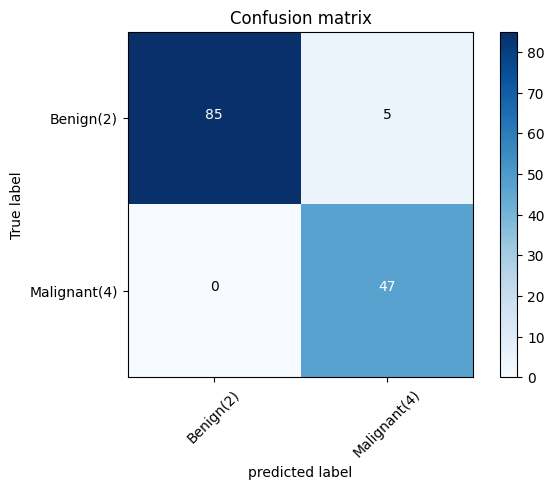

In [135]:
cnf_matrix = confusion_matrix(y_test,predicted_y,labels=[2,4])
np.set_printoptions(precision=2)
print (classification_report(y_test, predicted_y))
plt.figure()
plot_confusion_matrix(cnf_matrix,classes=['Benign(2)','Malignant(4)'],
                     normalize=False,
                     title='Confusion matrix',cmap=plt.cm.Blues)